### Null Hypothesis $H_0$:
Young adults (ages 18-30) on average ride citi bikes equal or *smaller distances per trip* to the control group,

### Alternative Hypothesis $H_a$:
Young adults (ages 18-30) on average ride farther distances per trip than the control group

#### Confidence Level $\alpha$:
For this analysis, I will use a confidence/__significance level__ of __0.05__ ($\alpha: 0.05$)


In [69]:
from __future__ import print_function
import os
print (os.getenv("PUIDATA"))

/nfshome/cb4184/PUIdata


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
!curl -O "https://s3.amazonaws.com/tripdata/201801-citibike-tripdata.csv.zip"
!unzip -u '*.zip' -d $PUIDATA

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22.1M  100 22.1M    0     0  49.3M      0 --:--:-- --:--:-- --:--:-- 49.3M
Archive:  201801-citibike-tripdata.csv.zip


In [72]:
PUIDATA = os.getenv("PUIDATA")
df = pd.read_csv(PUIDATA+'/201801-citibike-tripdata.csv', low_memory=False)

In [73]:
df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1


In [74]:
# I'm calculating distance to test my hypothesis
def CalcDist(lon1, lat1, lon2, lat2):
    '''
    Will Use this to calculate distance (straight line) from start to stop
    '''
    
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon=lon2-lon1
    dlat=lat2-lat1
    
    '''This is the distance formula'''
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

df['Distance'] = \
    CalcDist(df['start station longitude'], df['start station latitude'], df['end station longitude'], df['end station latitude'])
    

In [75]:
#Also need to add an 'Age' column
df['Age'] = (2018 - df['birth year']).astype(int)

df_reducted = df[['Age','Distance']]
df_reducted.head(3)

,Age,Distance
0,26,2.080202
1,49,1.855415
2,62,1.435362


In [79]:
# Create a subset of the data for 'young people' aged 18 to 30
youngpeople = df_reducted[(df_reducted['Age']>18)&(df_reducted['Age']<30)]
youngpeople.head(3)

,Age,Distance
0,26,2.080202
4,26,1.130394
13,27,1.030388


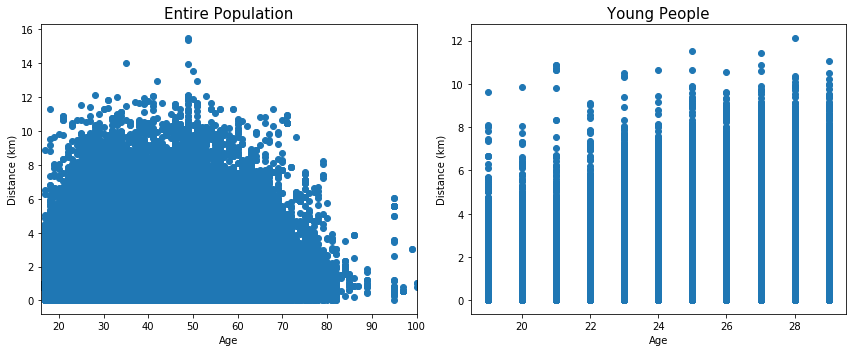

In [78]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.scatter(df_reducted['Age'],df_reducted['Distance'])
ax2.scatter(youngpeople['Age'],youngpeople['Distance'])
ax.set_title('Entire Population', fontsize=15)
ax2.set_title('Young People', fontsize=15)
ax.set_xlabel('Age')
ax.set_ylabel('Distance (km)')
ax.set_xlim(16,100)
ax2.set_xlabel('Age')
ax2.set_ylabel('Distance (km)')

plt.tight_layout()

__Figure 1:__ Graph on left is of the entire population (all age groups), with **Distance** plotted against **Age**. The graph on the right is for 'Young People' (aged 18-30). Intuitively, you can see that the entire population plot is somewhat positively skewed and peaks somewhere between 30-50 years old.

### Notes:
* The formula used for distance is not perfect because it is straight line. It would be better to calculate an actual biking distance using Google's API but you'd reach the API limit looping over all of the records in this dataset